In [1]:
import dex as dex


In [2]:
dexmodel = dex.DEXModel('caseStudy.xml')


In [3]:
default = dexmodel.get_intput_attributes()
default


{'Available positions': ['small', 'medium', 'large'],
 'SKPvsESCO': ['>10', '5 - 10', '< 5 new competences'],
 'Languages': ['no', 'yes'],
 'Driving licence': ['no', 'yes'],
 'Age appropriateness': ['no', 'yes'],
 'Disability appropriateness': ['no', 'yes'],
 'SKP Wish': ['no', 'yes'],
 'BO wishes for contract type': ['part time', 'not important', 'full time'],
 'Job contract type': ['part time', 'full time'],
 'BO career wishes': ['downgrade', 'same', 'upgrade career'],
 'Job career advancement': ['down', 'same', 'up'],
 'BO working hours wishes': ['daily/night shift', 'daily shift'],
 'Job working hours': ['daily/night shift', 'daily shift'],
 'MSO': ['> 20 km', '10 - 20 km', '< 10 km'],
 'BO wish location': ['no', 'yes']}

In [4]:
input_data = {'Available positions': 'small',
 'SKPvsESCO': '< 5 new competences',
 'Languages': 'yes',
 'Driving licence': 'no',
 'Age appropriateness': 'yes',
 'Disability appropriateness': 'no',
 'SKP Wish': 'yes',
 'BO wishes for contract type': 'part time',
 'Job contract type': 'full time',
 'BO career wishes': 'downgrade',
 'Job career advancement': 'down',
 'BO working hours wishes': 'daily/night shift',
 'Job working hours': 'daily/night shift', 
 'MSO': '10 - 20 km', 
 'BO wish location': 'no'}

In [5]:
eres, qq_res = dexmodel.evaluate_model(input_data)
eres
qq_res

{'Available positions': 1.0,
 'SKPvsESCO': 3.0,
 'Languages': 2.0,
 'Driving licence': 1.0,
 'Age appropriateness': 2.0,
 'Disability appropriateness': 1.0,
 'SKP Wish': 2.0,
 'BO wishes for contract type': 1.0,
 'Job contract type': 2.0,
 'BO career wishes': 1.0,
 'Job career advancement': 1.0,
 'BO working hours wishes': 1.0,
 'Job working hours': 1.0,
 'MSO': 2.0,
 'BO wish location': 1.0,
 'Skills': array([2.]),
 'Personal characteristics': array([0.96428571]),
 'Contract type': array([1.70588235]),
 'Career advance': array([3.16666667]),
 'Working hours': array([2.]),
 'Location': array([1.90384615]),
 'Skill appropriateness': array([1.99193548]),
 'Work type': array([2.91176471]),
 'Job appropriateness': array([2.14530543]),
 'SKP Evaluation': array([0.99725294])}

## Radar plot of a DEXi evaluation with matplotlib

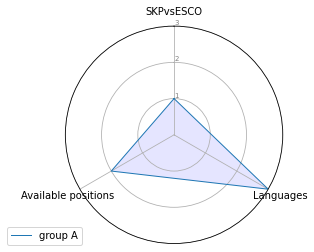

In [6]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame.from_dict(qq_res)
df = df[['Available positions','SKPvsESCO', 'Languages','Available positions']] # na prva i posledna pozicija treba da se stavi ist atribute zaradi radarot podolu. Popravi!

# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([1,2,3], ["1","2","3"], color="grey", size=7)
plt.ylim(0,3)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].values.flatten().tolist()
#values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group A")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
#values=df.loc[1].values.flatten().tolist()
#values += values[:1]
#ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
#ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()




## Radar plot of a DEXi evaluation with plotly

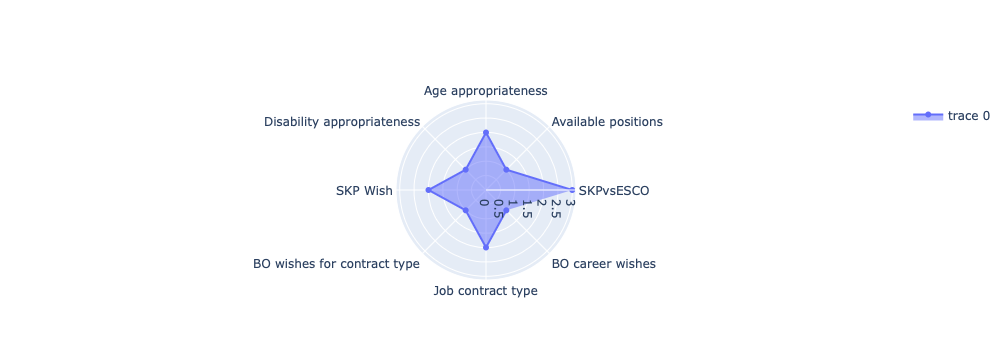

In [9]:
from plotly.offline import plot
from plotly.graph_objs import Scatter, Scatterpolar
import plotly.graph_objs as go

df = pd.DataFrame.from_dict(qq_res)
sel_cols = ['SKPvsESCO','Available positions', 'Age appropriateness',
 'Disability appropriateness',
 'SKP Wish',
 'BO wishes for contract type',
 'Job contract type',
 'BO career wishes']

fig = go.Figure()

r = []
for c in sel_cols:
    r.append(df.loc[:, c][0]) 
             


fig.add_trace(go.Scatterpolar(r=r, theta=sel_cols, fill='toself',))
fig.update_layout(polar=dict(radialaxis=dict(visible=True),),showlegend=True)

fig.show()

In [10]:
r

[3.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0]

In [11]:
df.loc[:, sel_cols]

,SKPvsESCO,Available positions,Age appropriateness,Disability appropriateness,SKP Wish,BO wishes for contract type,Job contract type,BO career wishes
0,3.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0


In [12]:
df.loc[:, c][0]

1.0